# TITANIC PASSENGER ANALYSIS

In examining this dataset, I shall be posing some questions and answering them as best as I can.

Below, is an image of the Data Dictionary explaining the different variables being examined in this analysis

<img src="Img.JPG">

### Some Questions Posed

1. The number of males and females aboard the titanic
2. The mean, median and modal ages of both males and female
3. The number of male survivors and female survivors
4. The mean, median and modal ages of survivors and dead by gender
5. Relationship between Ticket Fares and Embarkation Points
6. Relationship between Embarkation points and Survival
7. Relationship between Age and Survival
8. Relationship between Class and Survival
9. The group with the highest and least survival chances in the dataset

## WRANGLING & EXPLORATION

### Understanding the Dataset

The first step in trying to understand the dataset is reading the CSV into our jupyter notebook using pandas read_csv function which converts the CSV into a dataframe. We also import the NumPy and Seaborn libraries to aid our operations and visualizations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Titanic = pd.read_csv('titanic_data.csv')

#### Identifying the Inconsistencies in the Dataset

We use the .info() function which shows the number of rows in each column and in this case, serves as a guide to possible missing values and inconsistencies in our dataset.

In [2]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We notice some inconsistencies in the number of entries for certain columns - Age, Cabin and Embarked - in the dataset.
I will proceed to unify the number of rows in each column. For this analysis, I shall only be focusing on the Age and Embarked columns.

### Data Cleaning

Having noted the missing values in our dataset, the next step is cleaning it to make sure we work with an unbiased dataset as much as possible.

I shall be removing the Cabin column as the values are too few to be meaningful in our analysis. I shall also be removing the Ticket column as I will not be using it in this analysis.

#### Removing Columns

In [3]:
#Using the drop function to remove multiple columns from a pandas dataframe
Titanic.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

**We run a check to make sure the column has been deleted using the .head() function**

In [4]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


**Having noted the columns removal, we then remove the rows with incomplete data i.e. Rows with values NaN.**

In [5]:
#Using dropna to remove values with Nan in the specified columns from the dataset
titanic = Titanic.dropna(subset = ['Age', 'Embarked'])

**Using the pandas .info() function again to check if our data is consistent**

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


We now have a workable dataset with uniform entries. Thus, we can proceed to our analysis.

## Analysis

### 1. Gender Distribution

In [7]:
Male = titanic[titanic.Sex == 'male']
Female = titanic[titanic.Sex == 'female']

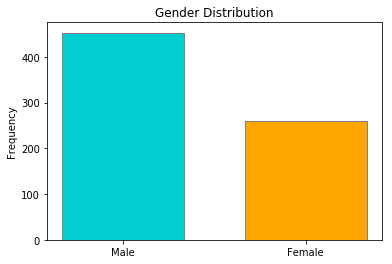

There were 259 females and 453 males aboard the titanic


In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
Gender = fig.add_subplot(111)
Gender.bar([1], [len(Male.index)], width = 1, color = 'darkturquoise', edgecolor='gray', label = 'Male')
Gender.bar([2.5], [len(Female.index)], width = 1, color = 'orange', edgecolor='gray', label = 'Female')
Gender.set_title("Gender Distribution")
Gender.set_ylabel("Frequency")
plt.xticks([1, 2.5], ['Male', 'Female'])
plt.show()
print ("There were {0} females and {1} males aboard the titanic".format(len(Female.index), len(Male.index)))

### 2. Age Distribution

We intend to discover the distribution of Ages on passengers aboard the titanic according to the dataset. Data is visualized with a histogram.

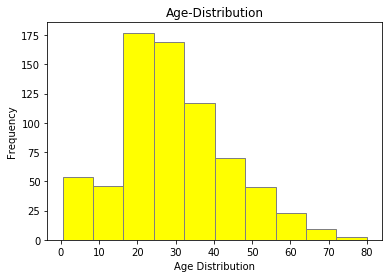

In [9]:
titanic_age = titanic['Age']
titanic_age.plot(kind='hist', color = 'yellow', edgecolor = 'gray', title = 'Age-Distribution')
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.show()

#### i. Age - Gender Distribution

I want to explore the Gender - Age distribution data. 

Firstly, I'll use groupby function to group together by the 'Sex' column.

In [10]:
Gender_Sex = titanic.groupby(['PassengerId', 'Age', 'Sex'], as_index=False).count()
bins = [0, 5, 13, 21, 33, 50, 65, 90]
group_names = ['0-5', '6-13', '14-21', '22-33', '34-50', '51-65', '66-90']
Gender_Sex['categories'] = pd.cut(Gender_Sex['Age'], bins, labels=group_names)

In [11]:
Gender_data = Gender_Sex.groupby('categories').Sex.value_counts()
Gender_plot = Gender_data.unstack().fillna(0)
Gender_Age = titanic.groupby('Sex')['Age']
Gender_Age_Mean = titanic.groupby(['Sex'])['Age'].mean()
Gender_Age_Mode = titanic.groupby(['Sex'])['Age'].agg(lambda x:x.value_counts().index[0])
Gender_Age_Median = titanic.groupby(['Sex'])['Age'].median()

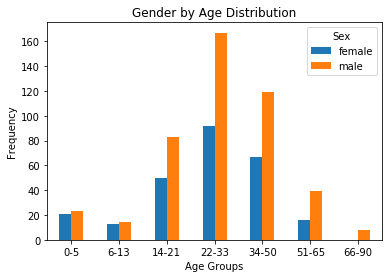

Mean Age for Males:  30.7266445916
Mean Age for Females:  27.7451737452


Modal Age for Males:  28.0
Modal Age for Females:  24.0


Median Age for Males:  29.0
Median Age for Males:  29.0


In [12]:
%matplotlib inline
Gender_plots = Gender_plot.plot(kind='bar', rot=0, title = 'Gender by Age Distribution')
Gender_plots.set_xlabel("Age Groups")
Gender_plots.set_ylabel("Frequency")
plt.show()
print ("Mean Age for Males: ", Gender_Age_Mean.values[1])
print ("Mean Age for Females: ", Gender_Age_Mean.values[0])
print ("\n")
print ("Modal Age for Males: ", Gender_Age_Mode.values[1])
print ("Modal Age for Females: ", Gender_Age_Mode.values[0])
print ("\n")
print ("Median Age for Males: ", Gender_Age_Median.values[1])
print ("Median Age for Males: ", Gender_Age_Median.values[1])

We observe that the age group 20 - 30 is the most popular age group

### 3. Class Distribution

We need to visualize the Class distribution of passengers according to this dataset

In [13]:
First_class = titanic[titanic.Pclass == 1]
Second_class = titanic[titanic.Pclass == 2]
Third_class = titanic[titanic.Pclass == 3]

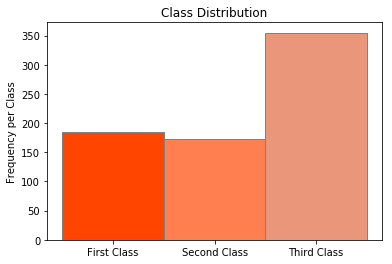

In [14]:
fig = plt.figure()
Class = fig.add_subplot(111)
Class.bar([1], [len(First_class.index)], width = 1, color = 'orangered', edgecolor='gray', label = 'First class')
Class.bar([2], [len(Second_class.index)], width = 1, color = 'coral', edgecolor='gray', label = 'Second class')
Class.bar([3], [len(Third_class.index)], width = 1, color = 'darksalmon', edgecolor='gray', label = 'Third class')
Class.set_title("Class Distribution")
Class.set_ylabel("Frequency per Class")
plt.xticks([1, 2, 3], ['First Class', 'Second Class', 'Third Class'])
plt.show()

In [15]:
print ("First Class:", len(First_class.index))
print ("Second Class:", len(Second_class.index))
print  ("Third Class:", len(Third_class.index))

First Class: 184
Second Class: 173
Third Class: 355


From the chart, we can observe there were more third class occupants of the titanic with 355 passengers.

#### i. Class by Gender Distribution

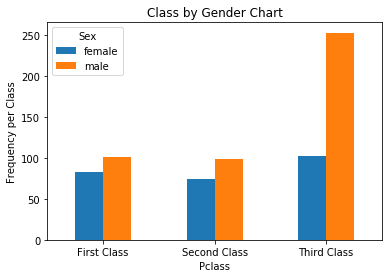

In [16]:
Class_data = titanic.groupby(['Pclass']).Sex.value_counts()
Class_data = Class_data.unstack().fillna(0)  #Fillna() function is used for filling Nan values with an inputed number
Class_Gender_Chart = Class_data.plot(kind='bar', rot=0, title = "Class by Gender Chart")
plt.ylabel("Frequency per Class")
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'])
plt.show()

#### ii. Mean Ticket Fares by Class

In [17]:
print ("The mean Ticket Fare for First Class:", First_class['Fare'].mean())
print ("The mean Ticket Fare for Second Class:", Second_class['Fare'].mean())
print ("The mean Ticket Fare for Third Class:", Third_class['Fare'].mean())

The mean Ticket Fare for First Class: 88.0481211957
The mean Ticket Fare for Second Class: 21.4715560694
The mean Ticket Fare for Third Class: 13.2294352113


### 4. Survivor - Dead Distribution

In [18]:
Dead = titanic[titanic.Survived == 0]
Alive = titanic[titanic.Survived == 1]

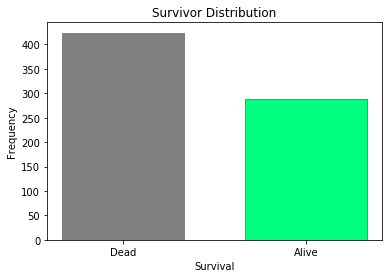

In [19]:
fig = plt.figure()
Survivor = fig.add_subplot(111)
Survivor.bar([1], [len(Dead.index)], width = 1, color = 'gray', edgecolor='gray', label = 'Dead')
Survivor.bar([2.5], [len(Alive.index)], width = 1, color = 'springgreen', edgecolor='gray', label = 'Alive')
Survivor.set_title("Survivor Distribution")
Survivor.set_xlabel("Survival")
Survivor.set_ylabel("Frequency")
plt.xticks([1, 2.5], ['Dead', 'Alive'])
plt.show()

We can infer that more than half the passenger population perished on the titanic

#### i. Survivor by Gender

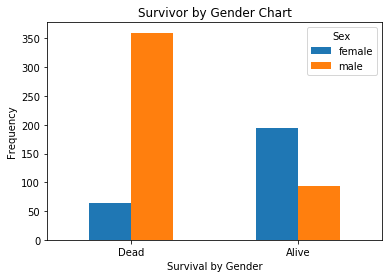

The number of dead:  424
The number of survivors:  288
There were 360 males and 64 females who perished (according to the dataset) on the titanic
There were 93 males and 195 females who survived the titanic


In [20]:
Survivor_data = titanic.groupby(['Survived']).Sex.value_counts()
Number_of_Dead = Survivor_data[0].values
Number_of_Alive = Survivor_data[1].values
Survivors = Survivor_data.unstack().fillna(0)  #Fillna() function is used for filling Nan values with an inputed number
Survivors = Survivors.rename({0: 'Dead', 1: 'Alive'})
Chart = Survivors.plot(kind='bar', rot=0, title = "Survivor by Gender Chart")
Chart.set_xlabel("Survival by Gender")
Chart.set_ylabel("Frequency")
plt.show()
print ("The number of dead: ", Number_of_Dead.sum())
print ("The number of survivors: ", Number_of_Alive.sum())
print ("There were {0} males and {1} females who perished (according to the dataset) on the titanic".format(Number_of_Dead[0], Number_of_Dead[1]))
print ("There were {0} males and {1} females who survived the titanic".format(Number_of_Alive[1], Number_of_Alive[0]))

We can infer that more men died and women had higher chances of survival. 

#### ii. Survivor by Class Distribution

Using the seaborn feature, we plot the distribution of Class and Survivorship to spot any possible relationships

Populating the interactive namespace from numpy and matplotlib


C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0.98,'Survival Rate by Class Distribution')

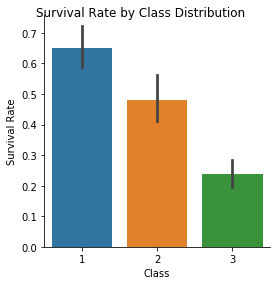

In [21]:
%pylab inline
Survivor_class_plot = sns.factorplot('Pclass', 'Survived', data = titanic, kind = 'bar')
Survivor_class_plot.set_axis_labels("Class", "Survival Rate")
fig = Survivor_class_plot.fig
fig.suptitle('Survival Rate by Class Distribution')

#### iii. Survivor by Gender and Class

Digging deeper, we want to check the gender breakdown of the Class - Survivor chart above, to see any possible relationships

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,0.98,'Survival Rate by Gender and Class Distribution')

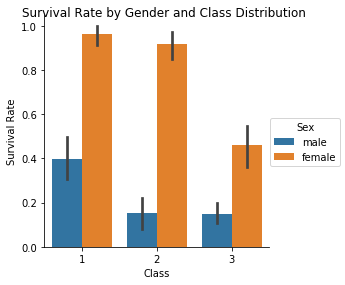

In [22]:
Survivor_Gender_class_plot = sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = titanic, kind = 'bar')
Survivor_Gender_class_plot.set_axis_labels("Class", "Survival Rate")
fig = Survivor_Gender_class_plot.fig
fig.suptitle('Survival Rate by Gender and Class Distribution')

We notice that people from the First Class had higher chances of survival compared to the Second and Third Class

#### iv. Survivor by Age Distribution

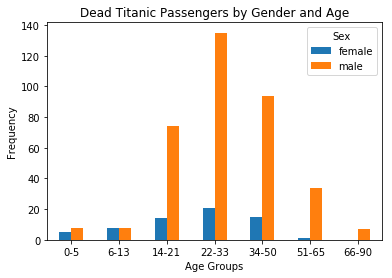

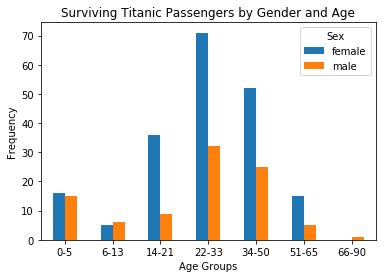

In [23]:
Gender = titanic.groupby(['PassengerId','Sex', 'Age', 'Survived'], as_index = False).count()
bins = [0, 5, 13, 21, 33, 50, 65, 90]
group_names = ['0-5', '6-13', '14-21', '22-33', '34-50', '51-65', '66-90']
Gender['categories'] = pd.cut(Gender['Age'], bins, labels=group_names)
Gender_plot = Gender.groupby(['categories', 'Sex']).Survived.value_counts().sort_index()
Gender_plots = Gender_plot.unstack().fillna(0)
Dead = Gender_plots[0].unstack()
Alive = Gender_plots[1].unstack()
Dead_plot = Dead.plot(kind='bar', rot=0, title = 'Dead Titanic Passengers by Gender and Age')
Alive_plot = Alive.plot(kind='bar', rot=0, title = 'Surviving Titanic Passengers by Gender and Age')
Dead_plot.set_xlabel("Age Groups")
Alive_plot.set_xlabel("Age Groups")
Dead_plot.set_ylabel("Frequency")
Alive_plot.set_ylabel("Frequency")
plt.show()

We observe that the age group for both genders with the highest number of deaths is 22 - 33. 
We observe that the age group for both genders with the highest number of survival is 22 - 33. 

This is too inconclusive and bears further analysis. To further understand the above chart, I'm going to explore whether Class had any relationship with Survival chances.

#### v. Mean, Modal and Median Age of Survivors

In [24]:
Mean_Survivor_Data = titanic.groupby(['Sex', 'Survived'])['Age'].mean()
Modal_Survivor_Data = titanic.groupby(['Sex', 'Survived'])['Age'].agg(lambda x:x.value_counts().index[0])
Median_Survivor_Data = titanic.groupby(['Sex', 'Survived'])['Age'].median()

In [25]:
print ("Mean Age for Dead Males: ", Mean_Survivor_Data.values[2])
print ("Mean Age for Dead Females: ", Mean_Survivor_Data.values[0])
print ("Mean Age for Surviving Males: ", Mean_Survivor_Data.values[3])
print ("Mean Age for Surviving Females: ", Mean_Survivor_Data.values[1])
print ("\n")
print ("Modal Age for Dead Males: ", Modal_Survivor_Data.values[2])
print ("Modal Age for Dead Females: ", Modal_Survivor_Data.values[0])
print ("Modal Age for Surviving Males: ", Modal_Survivor_Data.values[3])
print ("Modal Age for Surviving Females: ", Modal_Survivor_Data.values[1])
print ("\n")
print ("Median Age for Dead Males: ", Median_Survivor_Data.values[2])
print ("Median Age for Dead Females: ", Median_Survivor_Data.values[0])
print ("Median Age for Males: ", Median_Survivor_Data.values[3])
print ("Median Age for Males: ", Median_Survivor_Data.values[1])

Mean Age for Dead Males:  31.6180555556
Mean Age for Dead Females:  25.046875
Mean Age for Surviving Males:  27.2760215054
Mean Age for Surviving Females:  28.6307692308


Modal Age for Dead Males:  28.0
Modal Age for Dead Females:  18.0
Modal Age for Surviving Males:  32.0
Modal Age for Surviving Females:  24.0


Median Age for Dead Males:  29.0
Median Age for Dead Females:  24.5
Median Age for Males:  28.0
Median Age for Males:  28.0


### 5. Family Relationships

In [26]:
Parent_Relations = titanic[titanic.Parch != 0]
Sibling_Relations = titanic[titanic.SibSp != 0]
Non_Parch = titanic[titanic.Parch == 0]
Non_SibSp = titanic[titanic.SibSp == 0]

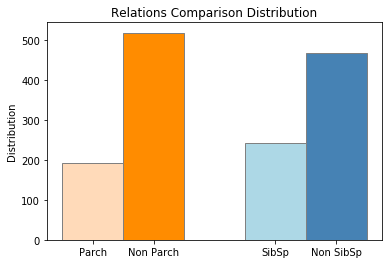

In [27]:
fig = plt.figure()
s = fig.add_subplot(111)
s.bar([1], [len(Parent_Relations.index)], width = 1, color = 'peachpuff', edgecolor='gray', label = 'Parent-Child Relationships')
s.bar([2], [len(Non_Parch.index)], width = 1, color = 'darkorange', edgecolor='gray', label = 'Non Parent-Child Relationships')
s.bar([4], [len(Sibling_Relations)], width = 1, color = 'lightblue', edgecolor='gray', label = 'Sibling Spouse Relationships')
s.bar([5], [len(Non_SibSp)], width = 1, color = 'steelblue', edgecolor='gray', label = 'Non Sibling-Spouse Relationships')

s.set_title("Relations Comparison Distribution")
s.set_ylabel("Distribution")
plt.xticks([1, 2, 4, 5], ['Parch', 'Non Parch', 'SibSp', 'Non SibSp'])
plt.show()

Majority of Passengers did not have any relations; direct or indirect, on board

### 6. Embarkation Distribution

We want to determine the distribution of people who embarked at different stations

Using the Seaborn countplot function, we aim to display categorical data

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


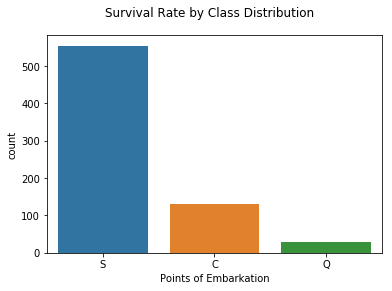

In [28]:
S = titanic[titanic.Embarked == 'S']
C = titanic[titanic.Embarked == 'C']
Q = titanic[titanic.Embarked == 'Q']
Embarkation = sns.countplot(x="Embarked", data=titanic)
plt.xlabel("Points of Embarkation")
plt.suptitle('Survival Rate by Class Distribution')
plt.show()

<pre> From our data dictionary, we know that
    S - Southampton
    C - Cherbourg
    Q - Queenstown
    
From our chart, we can state that Southampton had the highest number of embarkations </pre>

#### i. Embarkation - Gender Distribution

We plot this distribution using the seaborn countplot function

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'Embarkation by Gender')

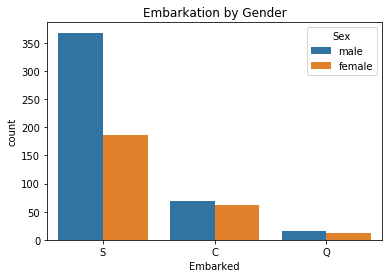

In [29]:
Embarkation_by_Gender = sns.countplot(x="Embarked", hue="Sex", data=titanic)
Embarkation_by_Gender.set_title('Embarkation by Gender')

As expected, the station with both the highest number of male and female passengers is Southampton. 

Going further, we explore the class distribution on a station by station basis

#### ii. Embarkation by Class

##### First Class

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,0,'Point of Embarkation')

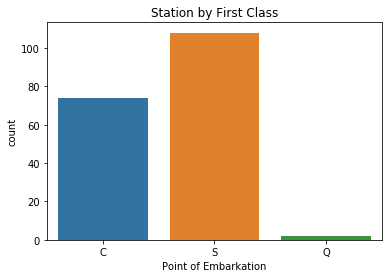

In [30]:
Embarkation_First_Class = sns.countplot(x="Embarked", data=First_class)
plt.title("Station by First Class")
plt.xlabel("Point of Embarkation")

There were more first class Passengers at Southampton Station

##### Second Class

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Station by Second Class')

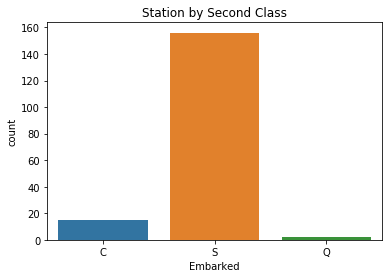

In [31]:
Embarkation_Second_Class = sns.countplot(x="Embarked", data=Second_class)
Embarkation_Second_Class.set_title("Station by Second Class")

##### Third Class

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Station by Third Class')

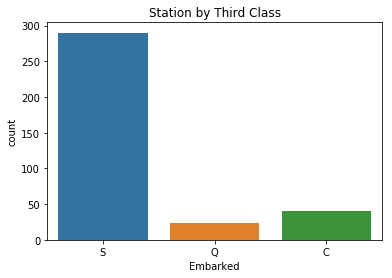

In [32]:
Embarkation_Third_Class = sns.countplot(x="Embarked", data=Third_class)
Embarkation_Third_Class.set_title("Station by Third Class")

#### iii. Survivor by Embarkation - Class

Exploring the number of each class embarked by each station

C:\Users\Kelechi Ibekwe\Anaconda3\envs\Projects\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


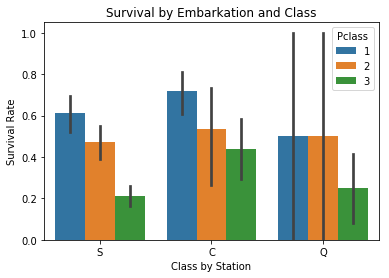

In [33]:
Embarkation_by_Class_Survivor = sns.barplot(x="Embarked", y = "Survived", hue="Pclass", data=titanic)
Embarkation_by_Class_Survivor.set(xlabel='Class by Station', ylabel='Survival Rate')
plt.title("Survival by Embarkation and Class")
plt.show()

It is worthy of note that people who boarded the Titanic from Cherbourg had higher survival chances across all classes

### 7. Fare per Embarkation Point

In [34]:
Southampton_First = S[S.Pclass == 1].Fare.mean()
Southampton_Second = S[S.Pclass == 2].Fare.mean()
Southampton_Third = S[S.Pclass == 3].Fare.mean()

print ("Mean Ticket Price for Southampton: ")
print ("First Class:", Southampton_First)
print ("Second Class:", Southampton_Second)
print ("Third Class:", Southampton_Third)

Mean Ticket Price for Southampton: 
First Class: 74.1724148148
Second Class: 21.075
Third Class: 13.5294510345


In [35]:
Cherbourg_First = C[C.Pclass == 1].Fare.mean()
Cherbourg_Second = C[C.Pclass == 2].Fare.mean()
Cherbourg_Third = C[C.Pclass == 3].Fare.mean()

print ("Mean Ticket Price for Southampton: ")
print ("First Class:", Cherbourg_First)
print ("Second Class:", Cherbourg_Second)
print ("Third Class:", Cherbourg_Third)

Mean Ticket Price for Southampton: 
First Class: 108.246398649
Second Class: 26.8119466667
Third Class: 11.3699268293


In [36]:
Queenstown_First = Q[Q.Pclass == 1].Fare.mean()
Queenstown_Second = Q[Q.Pclass == 2].Fare.mean()
Queenstown_Third = Q[Q.Pclass == 3].Fare.mean()

print ("Mean Ticket Price for Southampton: ")
print ("First Class:", Queenstown_First)
print ("Second Class:", Queenstown_Second)
print ("Third Class:", Queenstown_Third)

Mean Ticket Price for Southampton: 
First Class: 90.0
Second Class: 12.35
Third Class: 12.7809041667


### 8. Fare - Age by Class Correlation

We want to see if there's any relationship between Fare and Age

#### i. First Class

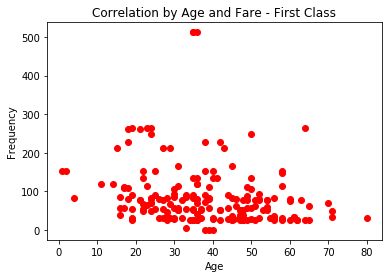

Correlation between Age and Fares for First Class is -0.219308604027


In [37]:
First_class_plot = plt.scatter(First_class.Age, First_class.Fare, c='r')
plt.title("Correlation by Age and Fare - First Class")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print ("Correlation between Age and Fares for First Class is", First_class['Age'].corr(First_class['Fare']))

#### ii. Second Class

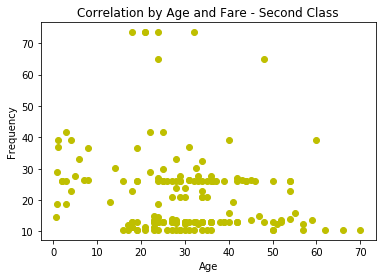

Correlation between Age and Fares for Second Class is -0.197038357716


In [38]:
Second_class_plot = plt.scatter(Second_class.Age, Second_class.Fare, c = 'y')
plt.title("Correlation by Age and Fare - Second Class")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print ("Correlation between Age and Fares for Second Class is", Second_class['Age'].corr(Second_class['Fare']))

#### iii. Third Class

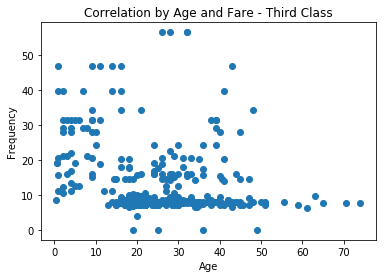

Correlation between Age and Fares for Third Class is -0.260314698259


In [39]:
Third_class_plot = plt.scatter(Third_class.Age, Third_class.Fare)
plt.title("Correlation by Age and Fare - Third Class")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
print ("Correlation between Age and Fares for Third Class is", Third_class['Age'].corr(Third_class['Fare']))

From the charts above, we can infer that age does not show a relationship with ticket Fares

### Results

From this dataset and my analysis, we can predict to some extent the chances of survival. 

Women with First Class tickets had the strongest chances of survival while men in the Third Class had the worst chances of survival followed by men in the Second class and subsequently followed by men in the First class. 

Children between the ages 0 and 13 were the least affected age group with minimal casualties. The group with the lowest survivors is Men between ages 65 - 90.

Going further, I explore the relationships between Categorical data to confirm my assumptions.

### Relationships for Categorical Data

We use the pandas crosstab function to compute a cross-tabulation of several factors

In [40]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

As we are about to go through categorical variables while measuring relationships, we use the chi-square function

Procedure below for determining chi-square was obtained from <a href = "https://olegleyz.github.io/titanic_factors.html">Oleg</a>

In [41]:
def chi_sq(data,indep_var,dep_var):
    chi_crosstab = pd.crosstab(data[dep_var], data[indep_var])
    dep_var_index = titanic['Survived'].unique()
    chi_crosstab.index = dep_var_index
    
    indep_var_sum = chi_crosstab.sum()
    indep_var_index = indep_var_sum.index

    indep_var_total = chi_crosstab.sum().sum()

    exp_coef = chi_crosstab.sum(axis = 1) / indep_var_total
    
    chi_crosstab_exp = pd.DataFrame(np.outer(exp_coef,chi_crosstab.sum()))
    chi_crosstab_exp.columns = indep_var_index
    chi_crosstab_exp.index = dep_var_index
    
    chi_square_df = (chi_crosstab - chi_crosstab_exp)**2/chi_crosstab_exp
    chi_square = chi_square_df.sum().sum()
    
    dfreed = (len(data[indep_var].unique())-1)*(len(data[dep_var].unique())-1)
    crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                          df = dfreed)

    p_value = 1 - stats.chi2.cdf(x=chi_square,  # Find the p-value
                                 df=dfreed)    
    
    cramer_v = np.sqrt(chi_square/len(data))
    
    return chi_square, p_value, cramer_v

### Relationship between Gender and Survival

In [42]:
print ("Chi_square is {0}, P_value = {1} and Cramer_Value is {2}".format(chi_sq(titanic, 'Sex', 'Survived')[0], chi_sq(titanic, 'Sex', 'Survived')[1], chi_sq(titanic, 'Sex', 'Survived')[2]))

Chi_square is 205.13648469340086, P_value = 0.0 and Cramer_Value is 0.5367616233485031


### Relationship between Age and Survival

In [43]:
print ("Chi_square is {0}, P_value = {1} and Cramer_Value is {2}".format(chi_sq(titanic, 'Age', 'Survived')[0], chi_sq(titanic, 'Age', 'Survived')[1], chi_sq(titanic, 'Age', 'Survived')[2]))

Chi_square is 104.09890718065557, P_value = 0.10209429637643264 and Cramer_Value is 0.3823693637177402


### Relationship between Class and Survival

In [44]:
print ("Chi_square is {0}, P_value = {1} and Cramer_Value is {2}".format(chi_sq(titanic, 'Pclass', 'Survived')[0], chi_sq(titanic, 'Pclass', 'Survived')[1], chi_sq(titanic, 'Pclass', 'Survived')[2]))

Chi_square is 91.0807454879102, P_value = 0.0 and Cramer_Value is 0.3576624041581509


### Relationship between Embarkation and Survival

In [45]:
print ("Chi_square is {0}, P_value = {1} and Cramer_Value is {2}".format(chi_sq(titanic, 'Embarked', 'Survived')[0], chi_sq(titanic, 'Embarked', 'Survived')[1], chi_sq(titanic, 'Embarked', 'Survived')[2]))

Chi_square is 27.918691003688625, P_value = 8.660306799468387e-07 and Cramer_Value is 0.19801930377642984


### Relationship Analysis

Cramer Values are an indicator of the strength of the relationships between categorical and also non-nominal variables. 

From this <a href = "https://www.angelo.edu/faculty/ljones/gov3301/block14/objective3.htm">website</a>, I measured the strength of the Cramer scores

For the relationship between Age and Survival, we have a score of 0.38 which indicates a moderate positive relationship.

For the relationship between Class and Survival, we have a score of 0.35 which indicates a moderate positive relationship.

For the relationship between Embarkation and Survival, we have a score of 0.19 which indicates a low positive relationship.

## Limitations of Analysis

1. Some rows in the dataset contained missing values: There were rows of Passenger data that had to be removed as certain columns contained NaN/missing values. This reduced the strength of our analysis as the analysis did not cover all the passengers.

2. Correlation does not always imply causation

3. There were columns that were not used in this analysis i.e. Cabins, Tickets: Cabins determined the possible deck of the passengers and deck location could have played a strong role in survival. However, we cannot adequately measure this as not enough information was given.

4. Further deaths after survival of initial wreck are unaccounted for i.e. Freezing, Hypothermia

## References

1. https://chrisalbon.com/python/matplotlib_scatterplot_from_pandas.html
2. https://chrisalbon.com/python/pandas_with_seaborn.html
3. https://olegleyz.github.io/titanic_factors.html
4. https://www.angelo.edu/faculty/ljones/gov3301/block14/objective3.htm
5. https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot
6. https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe